# Introduction to Computer Vision - Lab 03

## Lab task 

Implement the Parametric approach for image classificaiton, with $f(x,W) = Wx$ on the CIFAR10 dataset, where $W$ is found by brute force.

In [ ]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load the cifar-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 48s 0us/step


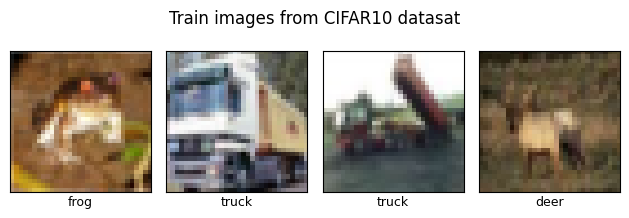

In [ ]:
# plot the first images from training set with the corresponding labels
fig, axs = plt.subplots(nrows=1, ncols=4)

for i in range(4):
    ax = axs[i]
    ax.imshow(train_images[i])
    ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    ax.set_title(labels[int(train_labels[i])],
                 fontsize=9,
                 y=-0.15)

plt.suptitle('Train images from CIFAR10 datasat',
             y=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# reshape the images of training set
x_train = train_images.reshape(train_images.shape[0], 32 * 32 * 3)
display(x_train.shape)
x_train

(50000, 3072)

array([[ 59,  62,  63, ..., 123,  92,  72],
       [154, 177, 187, ..., 143, 133, 144],
       [255, 255, 255, ...,  80,  86,  84],
       ...,
       [ 35, 178, 235, ...,  12,  31,  50],
       [189, 211, 240, ..., 195, 190, 171],
       [229, 229, 239, ..., 163, 163, 161]], dtype=uint8)

In [ ]:
# reshape the images of test set
x_test = test_images.reshape(test_images.shape[0], 32 * 32 * 3)
display(x_test.shape)
x_test

(10000, 3072)

array([[158, 112,  49, ...,  21,  67, 110],
       [235, 235, 235, ..., 186, 200, 199],
       [158, 190, 222, ...,   7,   8,   7],
       ...,
       [ 20,  15,  12, ...,  25,  20,  47],
       [ 25,  40,  12, ...,  92, 120,  80],
       [ 73,  78,  75, ...,  27,  26,  26]], dtype=uint8)

In [ ]:
# Softmax function
def Softmax(g):
    y = np.exp(g)
    y = y / sum(y)
    return y

In [ ]:
# loss function used is Cross-Entropy function,
# where y_hat is decision label vector and y - true label vector
def CrossEntropy(y_hat, y):
    loss = -np.dot(y, np.log(y_hat))
    return loss

In [ ]:
# convert labels to a label matrix with all zeros and 1s only at positions corresponding to the label
def labels_vec(labels):
    y = np.zeros([len(labels), 10])
    for i in range(len(labels)):
        y[i, labels[i]] = 1
    return y

In [ ]:
y_train, y_test = labels_vec(train_labels), labels_vec(test_labels)
display(y_train.shape)
y_train

(50000, 10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
# classifier model
def f(x, W):
    x = np.reshape(x, (32 * 32 * 3, 1))
    f = np.matmul(W, x)
    f = f / np.max(f)
    return f

In [ ]:
# a training phase: finding matrix of weights W that minimize the average loss function,
# x - training images, y - true label vector, n - number of iterations (brute force)
def find_w(x, y, n=2000):
    min_loss = 10**8
    best_W = np.zeros((10, 32*32*3))
    for i in tqdm(range(n)):
        # give some random initial value for W
        W = np.random.randn(10, 32*32*3)
        loss = np.zeros(len(x))
        # iterate through each training image
        for j in range(len(x)):
            x_j = x[j, :]
            # get the output of the classifier model
            g_j = f(x_j, W)
            # get the vector of decision labels
            y_hat_j = Softmax(g_j)
            # compute the loss
            loss[j] = CrossEntropy(y_hat_j, y[j, :])
        # compute the average loss
        avg_loss = np.mean(loss)
        # find best values for W
        if avg_loss < min_loss:
            best_W = W
            min_loss = avg_loss
    return best_W

In [ ]:
# a testing phase: get the predictions
# x_t - test images, y_t - true label vector, W - good matrix of weights
def test(x_t, y_t, W):
    # define the correct label and decision label vectors
    true_labels = np.zeros(len(x_t))
    predicted_labels = np.zeros(len(x_t))
    # iterate through each test image
    for i in range(len(x_t)):
        x_t_i, y_t_i = x_t[i, :], y_t[i, :]
        y_hat_i = np.matmul(W, x_t_i)
        # get the predicted label
        predicted_labels[i] = np.argmax(y_hat_i)
        # get the true label
        true_labels[i] = np.argmax(y_t_i)
    return true_labels, predicted_labels

In [ ]:
# a training phase: find the good W
W = find_w(x_train, y_train)

# testing phase: get the correct label and decision label vectors
true_labels, predicted_labels = test(x_test, y_test, W)

# calculate the accuracy score of the algorithm and print it
accuracy_score = sum(predicted_labels == true_labels) / len(predicted_labels)
print(f'\nAccuracy = {accuracy_score}')

100%|██████████| 2000/2000 [2:14:31<00:00,  4.04s/it]



Accuracy = 0.1257
